# Data visualization principles

---


Shachee Swadia, <em> The 5 Most Important Principles of Data Visualization </em>

🔵 [https://towardsdatascience.com/the-5-most-important-principles-of-data-visualization-455225a6c4b3]

<h3 style="text-align: center;"> 1) Tell the truth </h3>
<img src=https://drive.google.com/uc?id=1PyTIHyojAzYcALqpu8b02agJePcmmeP3 width=500></img>

<h3 style="text-align: center;"> 2) Know your audience </h3>

![picture](https://drive.google.com/uc?id=1AG10kbxDPN8nKrmMpTufzEYq97di2yrq)

<h3 style="text-align: center;"> 3) Choose the right chart </h3>

![picture](https://drive.google.com/uc?id=1BYYvnolydutmslJ2fCVTE3HiAojosLTt)

<h3 style="text-align: center;"> 4) Emphasize the important </h3>

![picture](https://drive.google.com/uc?id=1oCwrQOedg2ZbifY4ZFglYqk961nri6vu)

<h3 style="text-align: center;"> 5) Form should follow function </h3>

![picture](https://drive.google.com/uc?id=1arspRsieTIF6ATCDXDCJcZKXIUu8x7Hy)

# Imports

---

In [ ]:
import numpy as np  # ................. conda install numpy
import pandas as pd  # ................ conda install pandas

import seaborn as sns  # .............. conda install seaborn
import matplotlib.pyplot as plt

import plotly.express as px  # ........ conda install plotly 
import plotly.graph_objects as go

from celluloid import Camera  # ....... conda install celluloid
from IPython.display import HTML


plt.rcParams.update({'font.size': 15, 
                     'figure.figsize': (13, 7)})

In [ ]:
!pip install celluloid



# Basic plots with `matplotlib`
---


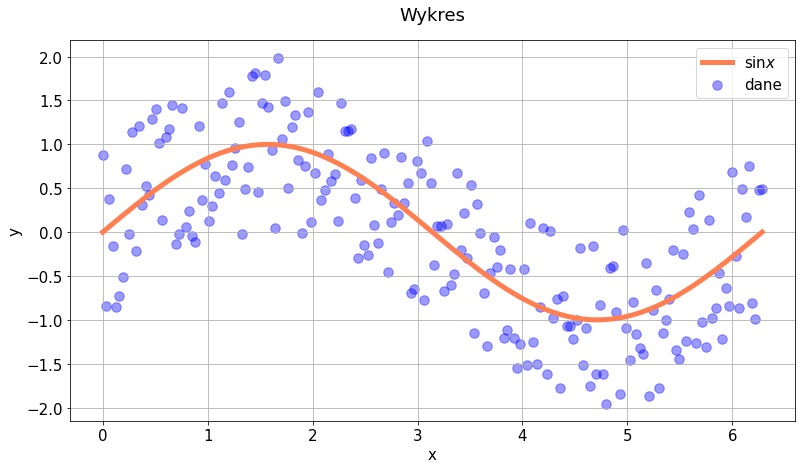

In [ ]:
xs = np.linspace(0, 2*np.pi, 200)
ys = np.sin(xs) + np.random.uniform(-1, 1, size=200)
plt.scatter(xs, ys, color="blue", alpha=0.4, s=90, marker="o", label="dane");
plt.plot(xs, np.sin(xs), color="coral", lw=5, label="$\sin{x}$")

plt.title("Wykres", pad=20)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

# plt.savefig()

# Object-oriented plotting with `matplotlib`
---

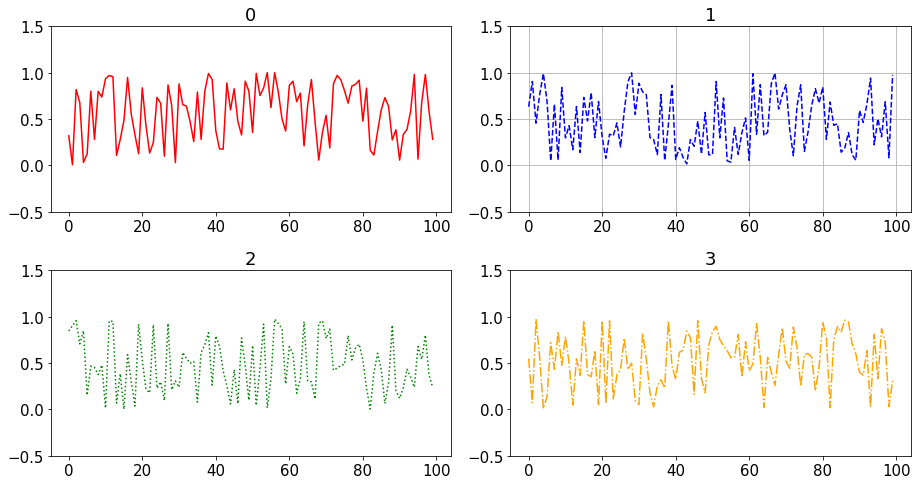

In [ ]:
fig, axes = plt.subplots(2,2, tight_layout=True)
colors = ["red", "blue", "green", "orange"]
linestyles = ["-", "--", ":", "-."]

for index, ax in enumerate(axes.ravel()): #ravel-spłaszczenie macierzy do enumerate
    xs = np.arange(100)
    ys = np.random.rand(100)
    ax.plot(xs, ys, color=colors[index], linestyle=linestyles[index])
    ax.set_ylim([-0.5, 1.5])
    ax.set_title(index)

axes[0,1].grid()
# fig.tight_layout()

# Basic animations with `Celluloid`

---

In [ ]:
def x(t, k=3):
  return np.cos(t*k)

def y(t, k=3):
  return np.sin(t+k)

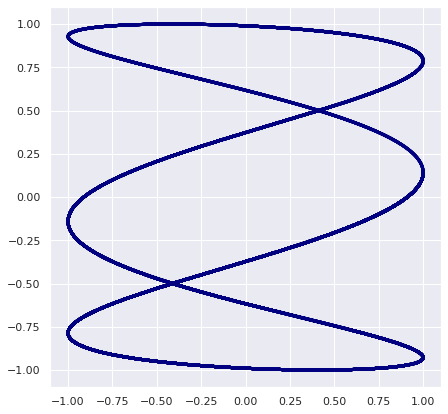

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
ts = np.linspace(0, 2*np.pi + 0.5, 1000)

frames = 100
camera = Camera(fig)

for i in range(frames):
  ax.plot(x(ts[:i*10]), y(ts[:i*10]), lw=3, color="navy")
  camera.snap()

In [ ]:
animation = camera.animate(blit=True, interval=30)

In [ ]:
# HTML(animation.to_jshtml)

# `Seaborn` - working with dataframes

---

🔵 https://seaborn.pydata.org/examples/index.html

In [ ]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [ ]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


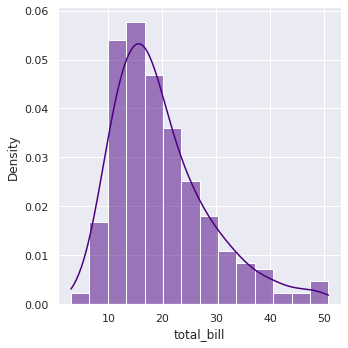

In [ ]:
sns.set_style("darkgrid")
sns.set_context("notebook")

sns.displot(data=tips, x="total_bill", stat="density", kde=True, color="indigo")

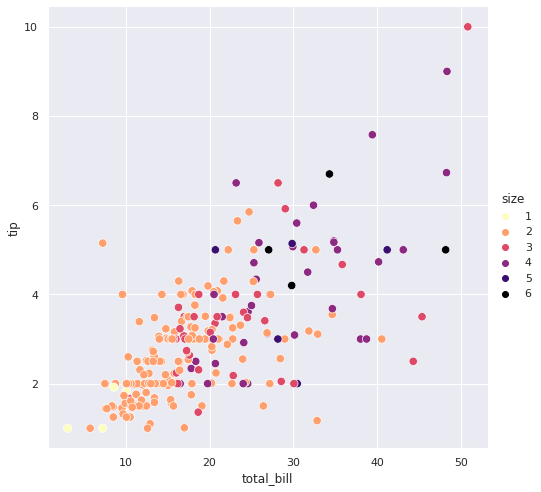

In [ ]:
# sns.scatterplot(data=tips, x="total_bill", y="tip")

# sns.lineplot(data=tips, x="total_bill", y="tip")

sns.relplot(data=tips, x="total_bill", y="tip",
            kind="scatter",
            hue="size",
            palette="magma_r",
            height=7,
            s=70)


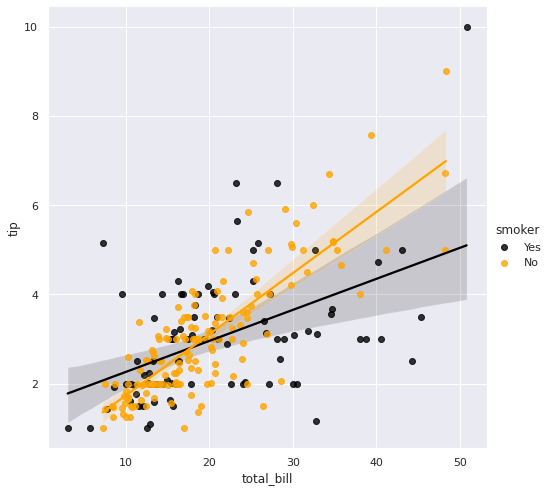

In [ ]:
#regresja liniowa
sns.lmplot(data=tips, x="total_bill", y="tip", hue="smoker", palette=["black", "orange"], height=7)


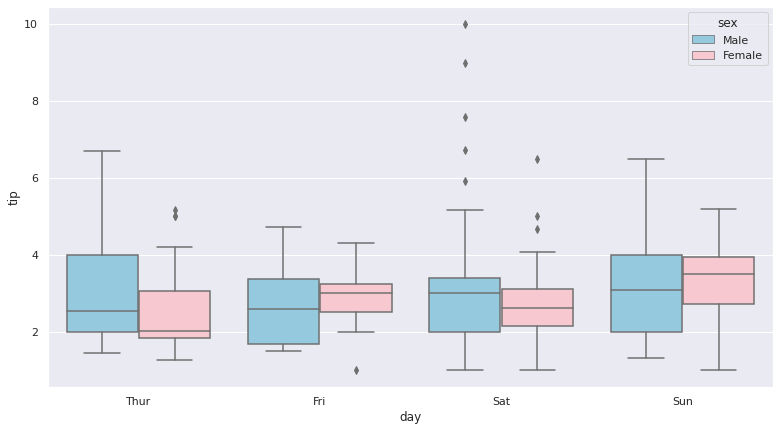

In [ ]:
sns.boxplot(data=tips, x="day", y="tip", hue="sex", palette=["skyblue","pink"])


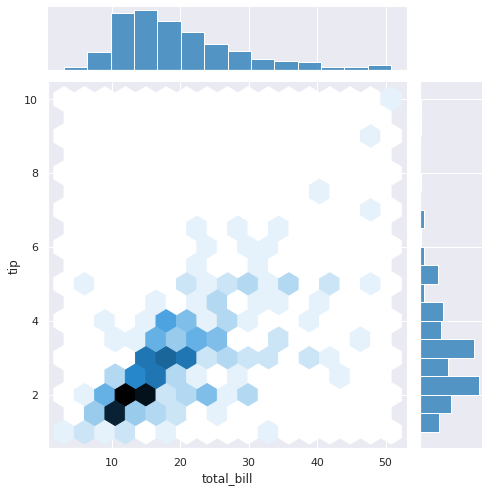

In [ ]:
sns.jointplot(data=tips, x="total_bill", y="tip", height=7, kind="hex")

# Interactive plots with `plotly`

---

🔵 https://plotly.com/python/

🔵 https://www.statworx.com/en/content-hub/blog/plotly-an-interactive-charting-library/  👇🏻👇🏻👇🏻

In [ ]:
fig = px.bar(x=["a", "b", "c"], y=[1,3,2], title="plotly express")
print(fig)
fig

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['a', 'b', 'c'], dtype=object),
              'xaxis': 'x',
              'y': array([1, 3, 2]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'plotly express'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})


In [ ]:
fig = go.Figure(
    data=[go.Bar(x=["a", "b", "c"], y=[1,3,2])],
    layout=dict(title=dict(text="Graph objects"))
)

print(fig)
fig

Figure({
    'data': [{'type': 'bar', 'x': ['a', 'b', 'c'], 'y': [1, 3, 2]}],
    'layout': {'template': '...', 'title': {'text': 'Graph objects'}}
})


In [ ]:
from plotly.subplots import make_subplots

fig=make_subplots(rows=1, cols=2)

fig.add_trace(go.Scatter(y=[4, 2, 1], mode="lines"), row=1, col=1)
fig.add_trace(go.Bar(y=[2, 1, 3]), row=1, col=2)


NameError: ignored

In [ ]:
df = px.data.gapminder()
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [ ]:
import plotly.express as px

px.scatter(df, x="gdpPercap", y="lifeExp",
           animation_frame="year",
           animation_group="continent",
           color = "country",
           size="pop",
           log_x = True,
           size_max = 55,
           range_x=[100, 1e5],
           range_y=[25,90])